In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [2]:
ames_preprocessed = pd.read_csv("https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv")

X = ames_preprocessed.drop('SalePrice', axis = 1)
y = ames_preprocessed['SalePrice']

In [3]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, 
                             params=params, 
                             nfold=2, 
                             num_boost_round=5, 
                             metrics="rmse", 
                             as_pandas=True, 
                             seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))


Best rmse as a function of l2:
    l2          rmse
0    1  40871.470438
1   10  42944.793376
2  100  52222.078307


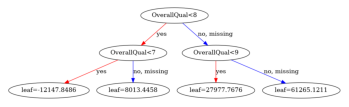

In [8]:
import matplotlib.pyplot as plt
import graphviz

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees = 0)
plt.show()

# Plot the fifth tree
# xgb.plot_tree(xg_reg, num_trees = 4)
# plt.show()

# # Plot the last tree sideways
# xgb.plot_tree(xg_reg, num_trees = 9, rankdir='LR')
# plt.show()

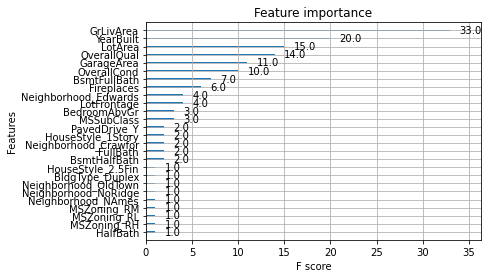

In [10]:
# using plot_importance() to show the important variables

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, 
                   dtrain=housing_dmatrix,
                   num_boost_round = 10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()